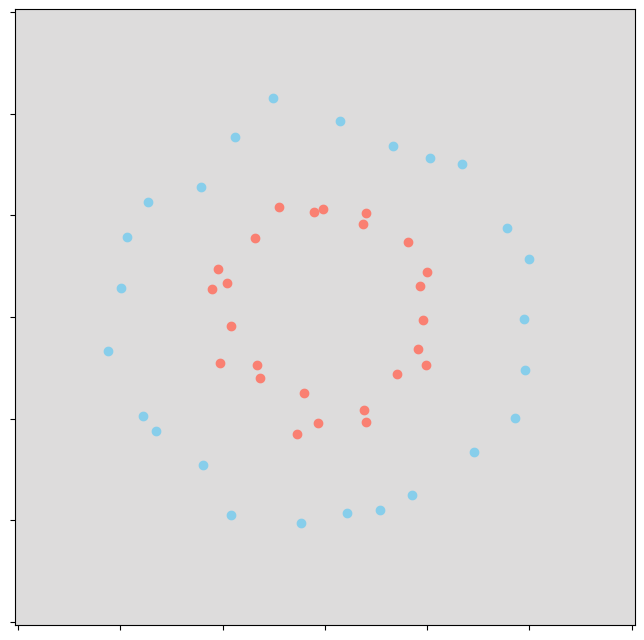

In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

# Creamos nuestros datos artificiales, donde buscaremos clacificar dos anillos
# concéntricos de datos

X, Y = make_circles(n_samples=50, factor=0.5, noise=0.05)

# Resolución de mapa de predicción
res = 100

# Coordenadas del mapa de predicción
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

# input con cada combo de coordenadas del mapa de predicción
_pX = np.array(np.meshgrid(_x0,_x1)).T.reshape(-1, 2)

# Objeto vacío a 0.5 del mapa de predicción
_pY = np.zeros((res, res)) + 0.5

# Visualización del mapa de predicción.
plt.figure(figsize=(8,8))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)

# Visualización de la nube de datos
plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

plt.tick_params(labelbottom=False, labelleft=False)



In [ ]:
# Creando Capas de Neuronas

from scipy import stats

class capa():
  def __init__(self, n_neuronas_capa_anterior, n_neuronas, funcion_act):
    self.funcion_act = funcion_act
    self.b  = np.round(stats.truncnorm.rvs(-1, 1, loc=0, scale=1, size= n_neuronas).reshape(1,n_neuronas),3)
    self.W  = np.round(stats.truncnorm.rvs(-1, 1, loc=0, scale=1, size= n_neuronas * n_neuronas_capa_anterior).reshape(n_neuronas_capa_anterior,n_neuronas),3)


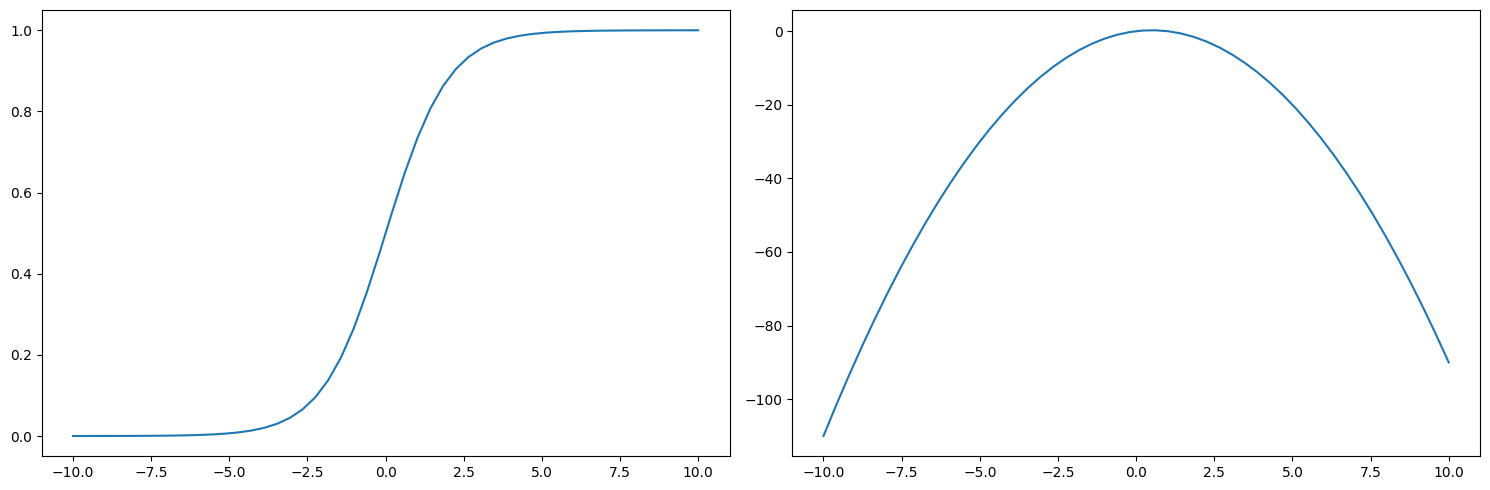

In [ ]:
# Función de activación: Función Sigmoide

import numpy as np
import math
import matplotlib.pyplot as plt


sigmoid = (
  lambda x:1 / (1 + np.exp(-x)),
  lambda x:x * (1 - x)
  )

rango = np.linspace(-10,10).reshape([50,1])
datos_sigmoide = sigmoid[0](rango)
datos_sigmoide_derivada = sigmoid[1](rango)

#Creemos los graficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize =(15,5))
axes[0].plot(rango, datos_sigmoide)
axes[1].plot(rango, datos_sigmoide_derivada)
fig.tight_layout()

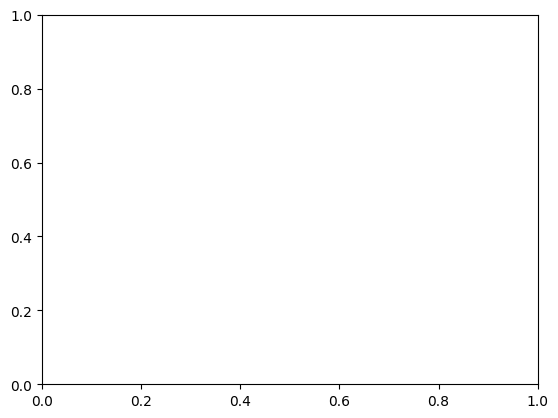

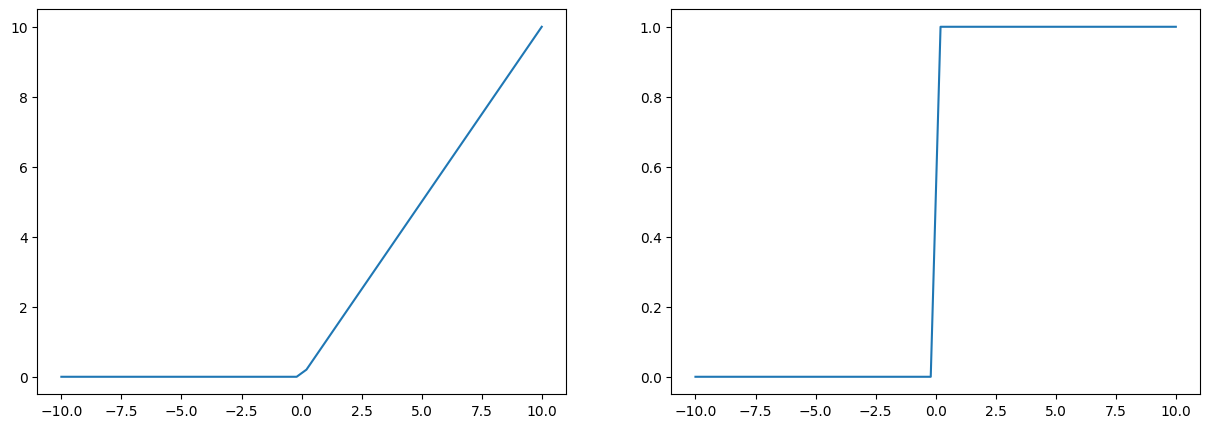

In [ ]:
# Función de activación: Función ReLu

def derivada_relu(x):
  x[x<=0] = 0
  x[x>0] = 1
  return x

relu = (
  lambda x: x * (x > 0),
  lambda x:derivada_relu(x)
  )

datos_relu = relu[0](rango)
datos_relu_derivada = relu[1](rango)


# Volvemos a definir rango que ha sido cambiado
rango = np.linspace(-10,10).reshape([50,1])

# Cremos los graficos
plt.cla()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize =(15,5))
axes[0].plot(rango, datos_relu[:,0])
axes[1].plot(rango, datos_relu_derivada[:,0])
plt.show()


In [ ]:
# Programando una red neuronal en Python

# Numero de neuronas en cada capa.
# El primer valor es el numero de columnas de la capa de entrada.
neuronas = [2,4,8,1]

# Funciones de activacion usadas en cada capa.
funciones_activacion = [relu,relu, sigmoid]

In [ ]:
red_neuronal = []

for paso in range(len(neuronas)-1):
  x = capa(neuronas[paso],neuronas[paso+1],funciones_activacion[paso])
  red_neuronal.append(x)

print(red_neuronal)


[<__main__.capa object at 0x7fb37148e860>, <__main__.capa object at 0x7fb371907ca0>, <__main__.capa object at 0x7fb371904b50>]


In [ ]:
X =  np.round(np.random.randn(20,2),3) # Ejemplo de vector de entrada

z = X @ red_neuronal[0].W

print(z[:10,:], X.shape, z.shape)

[[-0.061371  1.388504 -0.290768 -0.739356]
 [-0.207694 -2.216596  0.781233  1.536566]
 [-0.579573 -0.40738   0.705151  0.913422]
 [-0.430457  1.10696   0.163934 -0.144752]
 [ 0.389983 -1.0777   -0.129421  0.174838]
 [ 1.157534 -2.283596 -0.617753 -0.015526]
 [-0.036023 -1.630028  0.453441  0.993922]
 [ 0.258232 -2.3337    0.327841  1.061902]
 [-0.280758  0.436252  0.179861  0.072462]
 [ 0.134688 -0.780996  0.059649  0.299118]] (20, 2) (20, 4)


In [ ]:
z = z + red_neuronal[0].b

print(z[:5,:])

[[-0.013371  1.555504 -0.196768 -1.553356]
 [-0.159694 -2.049596  0.875233  0.722566]
 [-0.531573 -0.24038   0.799151  0.099422]
 [-0.382457  1.27396   0.257934 -0.958752]
 [ 0.437983 -0.9107   -0.035421 -0.639162]]


In [ ]:
a = red_neuronal[0].funcion_act[0](z)
a[:5,:]

array([[-0.      ,  1.555504, -0.      , -0.      ],
       [-0.      , -0.      ,  0.875233,  0.722566],
       [-0.      , -0.      ,  0.799151,  0.099422],
       [-0.      ,  1.27396 ,  0.257934, -0.      ],
       [ 0.437983, -0.      , -0.      , -0.      ]])

In [ ]:
output = [X]

for num_capa in range(len(red_neuronal)):
  z = output[-1] @ red_neuronal[num_capa].W + red_neuronal[num_capa].b
  a = red_neuronal[num_capa].funcion_act[0](z)
  output.append(a)

print(output[-1])

[[0.46803108]
 [0.85828584]
 [0.78912748]
 [0.52797693]
 [0.57961778]
 [0.46353656]
 [0.74887236]
 [0.71989201]
 [0.61143832]
 [0.65067011]
 [0.73742322]
 [0.47063736]
 [0.60661009]
 [0.62106121]
 [0.55196683]
 [0.77406523]
 [0.6713568 ]
 [0.56259853]
 [0.59090074]
 [0.68449947]]


Red Neuronal en Keras:

In [ ]:
pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
# Cargar los datos de MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar las imágenes para que los valores estén entre 0 y 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convertir las etiquetas a categorías
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),         # Aplana la imagen de 28x28 a un vector de 784
    Dense(128, activation='relu'),         # Capa oculta con 128 neuronas y ReLU
    Dense(64, activation='relu'),          # Otra capa oculta
    Dense(10, activation='softmax')        # Capa de salida con 10 neuronas (una por clase) y softmax
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',                # Optimización con Adam
              loss='categorical_crossentropy', # Pérdida de entropía cruzada categórica
              metrics=['accuracy'])            # Métrica de precisión

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.8812 - loss: 0.4162 - val_accuracy: 0.9631 - val_loss: 0.1208
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9665 - loss: 0.1097 - val_accuracy: 0.9727 - val_loss: 0.0893
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9778 - loss: 0.0709 - val_accuracy: 0.9758 - val_loss: 0.0833
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9838 - loss: 0.0512 - val_accuracy: 0.9754 - val_loss: 0.0814
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9877 - loss: 0.0389 - val_accuracy: 0.9764 - val_loss: 0.0756
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9894 - loss: 0.0317 - val_accuracy: 0.9783 - val_loss: 0.0755
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9907 - loss: 0.0275 - val_accuracy: 0.9774 - val_loss: 0.0758
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9921 - loss: 0.022

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'\nPrecisión en el conjunto de prueba: {test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9753 - loss: 0.1009

Precisión en el conjunto de prueba: 0.9793000221252441


Explicación de los pasos:

Estructura del modelo : Creamos una red de tres capas (entrada, una oculta y salida) con Densepara las capas densamente conectadas. La activación reluen las capas ocultas no introduce linealidad y softmaxen la capa de salida convierte la salida en probabilidades para cada clase.

Compilación : optimizer='adam'ajusta los pesos de la red, categorical_crossentropyse usa como la función de pérdida adecuada para clasificación multiclase, y metrics=['accuracy']permite evaluar qué tan bien se desempeña la red.

obtener matriz de confusión, reporte de clacificación, curva ROC, histograma de errores.

In [ ]:
pip install matplotlib scikit-learn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns


Obtener predicciones y etiquetas de prueba:

Después de entrenar el modelo, use el siguiente código para obtener las predicciones en el conjunto de prueba:

In [ ]:
# Predicciones del modelo
y_pred = model.predict(x_test)
# Convertir las probabilidades en etiquetas de clase
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Matriz de confusión:

La matriz de confusión nos permite ver el desempeño de la clasificación en cada clase.

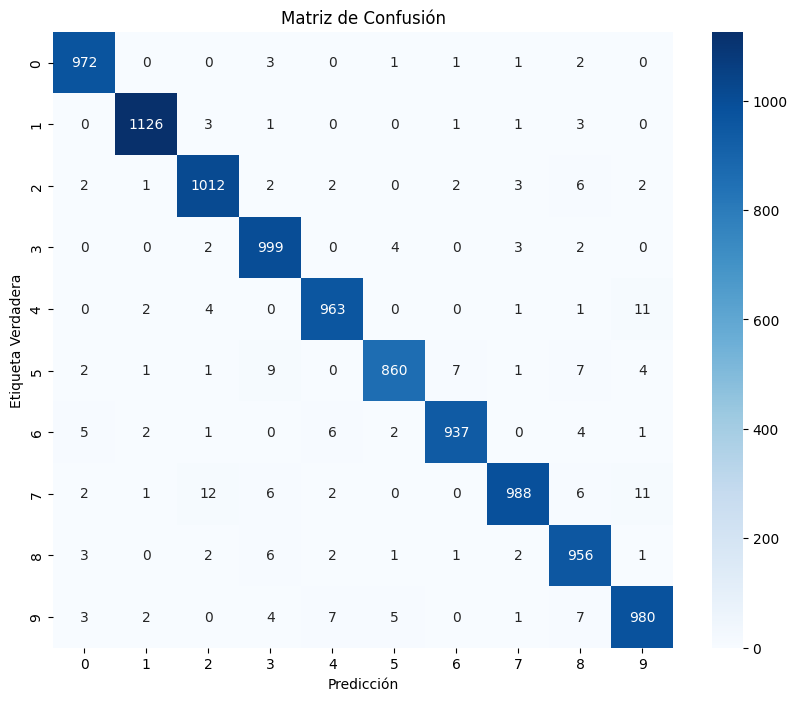

In [ ]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Graficar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Verdadera")
plt.title("Matriz de Confusión")
plt.show()

Informe de clasificación:

El informe de clasificación nos muestra la precisión, exhaustividad (recordación) y la puntuación F1 para cada clase.

In [ ]:
# Generar el reporte de clasificación
class_report = classification_report(y_true, y_pred_classes, target_names=[str(i) for i in range(10)])
print("Reporte de Clasificación:\n", class_report)

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.96      0.97       892
           6       0.99      0.98      0.98       958
           7       0.99      0.96      0.97      1028
           8       0.96      0.98      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Curvas ROC y AUC (para cada clase):

Para gráficos ROC multiclase, se puede calcular el AUC para cada clase. Primero, convertimos las etiquetas en formato binario.

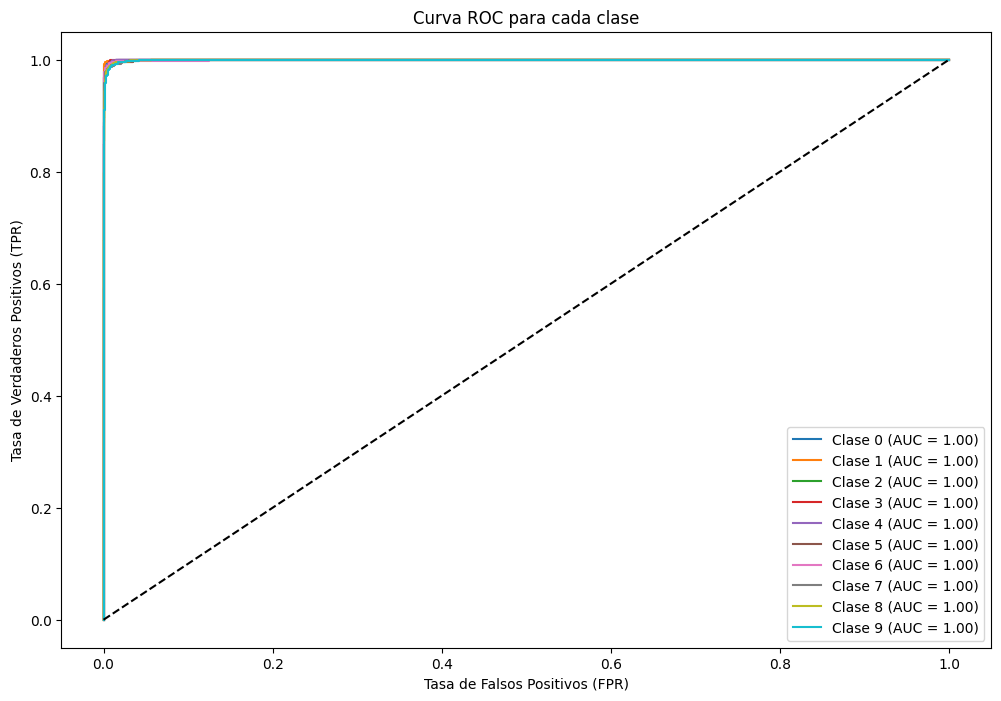

In [ ]:
# Convertir etiquetas verdaderas y predicciones a formato binario
y_test_bin = np.eye(10)[y_true]  # Convertir etiquetas a one-hot
y_pred_bin = y_pred  # `y_pred` ya está en formato de probabilidad

# Crear las curvas ROC para cada clase
plt.figure(figsize=(12, 8))
for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Clase {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC para cada clase")
plt.legend(loc="lower right")
plt.show()

 Histograma de errores:

Para el histograma de errores, graficaremos la diferencia entre las predicciones y las etiquetas verdaderas, mostrando los errores de clasificación.

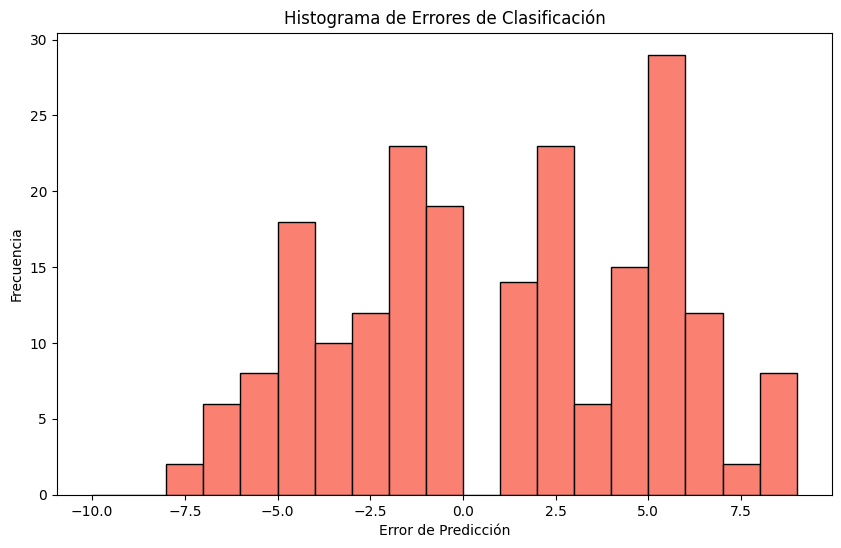

In [ ]:
# Calcular errores de predicción
errors = y_true - y_pred_classes

# Graficar histograma de errores
plt.figure(figsize=(10, 6))
plt.hist(errors[errors != 0], bins=np.arange(-10, 10, 1), color="salmon", edgecolor="black")
plt.xlabel("Error de Predicción")
plt.ylabel("Frecuencia")
plt.title("Histograma de Errores de Clasificación")
plt.show()